In [3]:
# openCV로 이미지 분석

In [2]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [3]:
image = cv2.imread('sample_image.jpg')
image_gray = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.IMREAD_GRAYSCALE : 흑백 이미지로 load

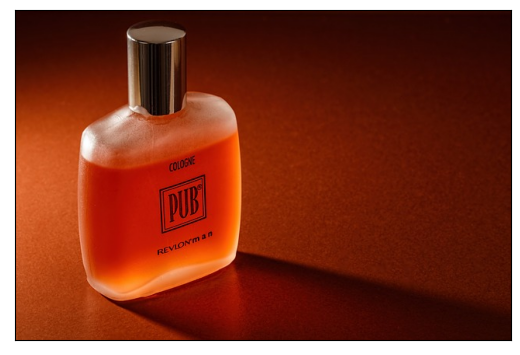

In [4]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
# rgb 3가지 층으로 이루어져 있고, image2로 병합
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# # window로 띄우기
# cv2.imshow('image', image)
# cv2.imshow('image_gray', image_gray)
 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
# use 가우시안 블러 : 이미지를 부드럽게 하기 때문에 배경과 원하지 않는 부분을 부드럽게 하여 해당 경계를 찾지 못하게 하기 위함. 
# 블러 처리를 심하게 하면 원래 찾고자 하는 대상을 찾지 못하게 되고, 블러가 약하면 배경의 외곽도 포함되므로 ksize를 적당히 조절 필요.
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [7]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [8]:
# ksize=(3,3)으로 해 주는 것이 외곽을 잘 찾는다. 
# 외곽의 수를 적게 찾아내도록 알고리즘을 짜주면 되겠지만 지금은 ksize=(5,5)로 해줄 때 원하는 이미지의 외곽을 잘 찾는다 판단
edged = cv2.Canny(blur, 10, 250)
# cv2.imshow('Edged', edged)
# cv2.waitKey(0)

In [9]:
# 엣지 이미지로 closed를 찾기
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('closed', closed)
# cv2.waitKey(0)


In [10]:
# 하얀 선이 굵어 지면서 edge 이미지에서 보이는 각 경계들이 이어지면서 중간에 끊어지지 않는 선이 된 것을 확인

In [11]:
# close이미지와 findContours()를 이용하여 컨투어 경계를 찾음
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

In [12]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
# contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
# cv2.imshow('contours_image', contours_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [14]:
contours_xy = np.array(contours)
contours_xy.shape
# 외곽을 저장하고 있는 contours는 외곽의 점들이 모여 선을 나타내므로 각 점의 좌표
# contours[] => 물체가 몇 개인지 나타냅니다. 하나의 닫힌 선이 물체 하나를 인식합니다. 
# 위에서는 다른 것을 인식하지 않고 향수병만 인식했으므로 물체는 한 개 입니다. 
# contours[][] => 이 때부터 각 좌표를 나타냅니다
# contours[][][x][y] -> 세번째와 네번째 부터는 각각 x축과 y축

(1, 356, 1, 2)

In [16]:
# x의 min과 max 찾기
# 외곽 좌표값으로 부터 각각 x와 y를 찾도록 코드
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)

80
292
12
375


In [18]:
# --------------------------------

In [19]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

In [20]:
# cv2.imshow('org_image', org_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()